## Neural network using keras

### first neural network on fashion datasets

In [44]:
import keras
import tensorflow as tf

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
k.backend.backend()

'tensorflow'

In [7]:
from keras.datasets import fashion_mnist

In [10]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


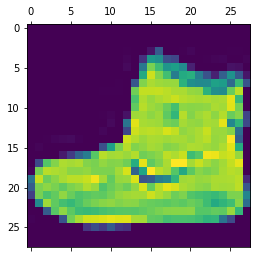

In [12]:
plt.matshow(x_train[0])

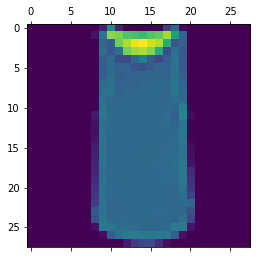

In [20]:
plt.matshow(x_train[2])

In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### lets start building neural network

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [78]:
# create a model
model = tf.keras.models.Sequential()

In [80]:
# Flatten convert 2D array into 1D array
# this is input layer
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

In [94]:
# second layer, this is called hidden layer

model.add(tf.keras.layers.Dense(200, activation= tf.nn.relu))

In [95]:
# output layer  
# output layer has 10 neuron beacuse classification label or our categories is 10.
# softmax function work as distributing set of number into probability of available classification classes.
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 20,120
Trainable params: 20,120
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [98]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s - loss: 0.4900 - acc: 0.8590    
Epoch 2/5
60000/60000 [==============================] - 9s - loss: 0.3818 - acc: 0.8723     
Epoch 3/5
60000/60000 [==============================] - 9s - loss: 0.3689 - acc: 0.8749     
Epoch 4/5
60000/60000 [==============================] - 9s - loss: 0.3604 - acc: 0.8782     
Epoch 5/5
60000/60000 [==============================] - 9s - loss: 0.3518 - acc: 0.8788     


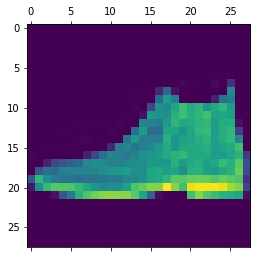

In [99]:
plt.matshow(x_test[0])

In [100]:
x_test.shape

(10000, 28, 28)

In [101]:
y_predict = model.predict(x_test)

In [102]:
y_predict[0]

array([2.0014511e-04, 6.7358138e-05, 1.0860861e-04, 6.1277555e-05,
       4.6675959e-05, 4.1373540e-02, 1.2218475e-04, 8.8992752e-02,
       1.5295419e-03, 8.6749792e-01], dtype=float32)

In [103]:
np.argmax(y_predict[0])

9

In [104]:
model.evaluate(x_test, y_test)

 9792/10000 [============================>.] - ETA: 0s

[0.4239385770082474, 0.8582]